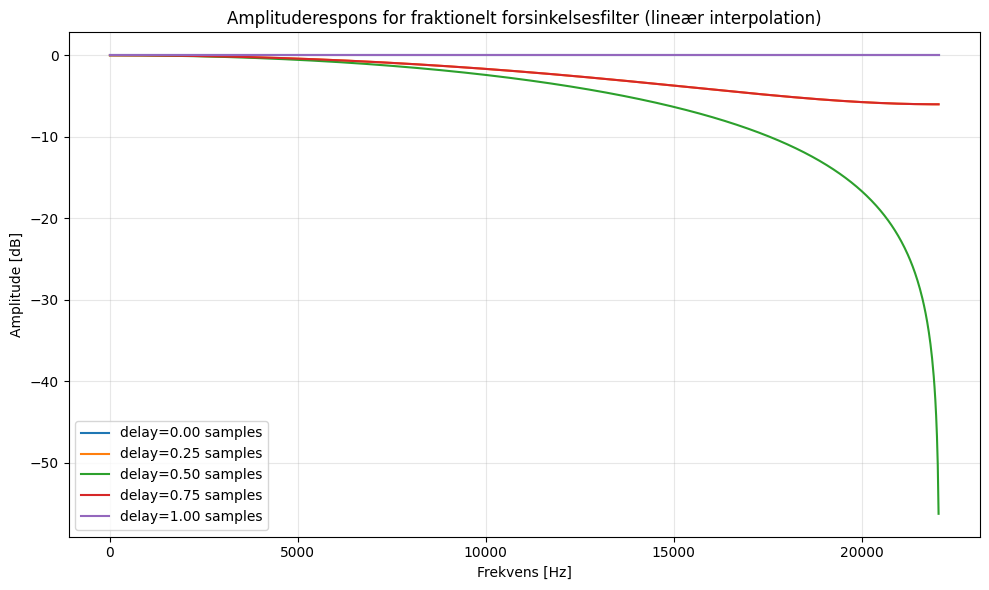

In [ ]:
import numpy as np  # Importerer numerisk bibliotek til arrays og matematik
import matplotlib.pyplot as plt  # Importerer plotting bibliotek

fs = 44100  # Samplerate (Hz)
N = 2048    # FFT længde (antal punkter i FFT)

# Lineær interpolationsfilter for fraktionel forsinkelse
def fractional_delay_filter(delay, N=64): # Delay er i samples
    n = np.arange(N)  # Skaber array med N værdier (0, 1, ..., N-1)
    h = np.zeros(N)   # Initialiserer filterkoefficienter med 0
    d_int = int(np.floor(delay))  # Heltalsdelen af forsinkelsen
    frac = delay - d_int          # Brøkdelen af forsinkelsen
    # Kun 2 tap lineær interpolation
    h[d_int] = 1 - frac          # Vægter for sample før forsinkelse
    if d_int + 1 < N:
        h[d_int + 1] = frac      # Vægter for sample efter forsinkelse
    return h                     # Returnerer filterkoefficienter

# Sweep forsinkelse fra 0 til 1 sample
delays = np.linspace(0, 1, 100)  # 100 værdier fra 0 til 1 sample
freq = np.linspace(0, fs/2, N//2)  # Frekvensakse til plot (op til Nyquist)
plt.figure(figsize=(10,6))  # Opretter figur

for d in [0, 0.25, 0.5, 0.75, 1.0]:  # Loop over forskellige forsinkelser
    h = fractional_delay_filter(d, N)  # Beregn filter for given forsinkelse
    H = np.fft.fft(h, N)               # FFT af filteret (frekvensrespons)
    plt.plot(freq, 20*np.log10(np.abs(H[:N//2])), label=f'delay={d:.2f} samples')  # Plot amplituderespons

plt.title('Amplituderespons for fraktionelt forsinkelsesfilter (lineær interpolation)')  # Titel
plt.xlabel('Frekvens [Hz]')  # X-akse label
plt.ylabel('Amplitude [dB]') # Y-akse label
plt.legend()                 # Vis forklaring
plt.grid(True, alpha=0.3)    # Gitter
plt.tight_layout()           # Stram layout
plt.show()                   # Vis figur

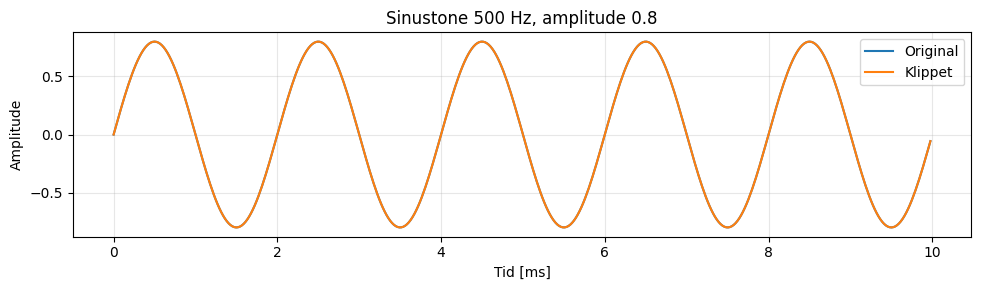

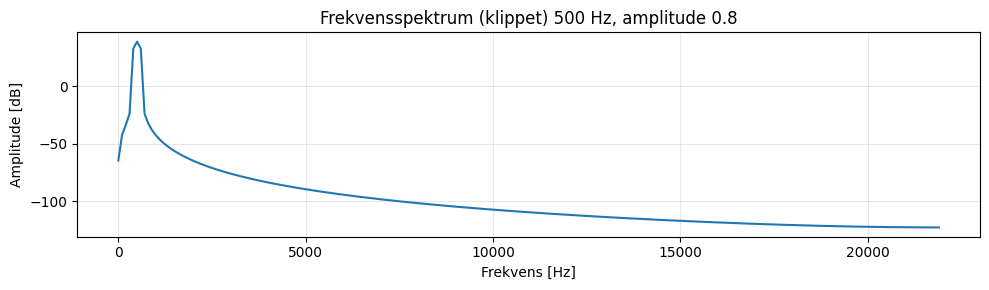

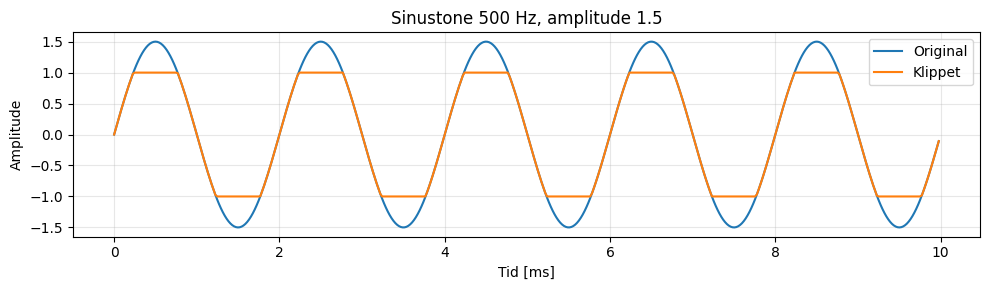

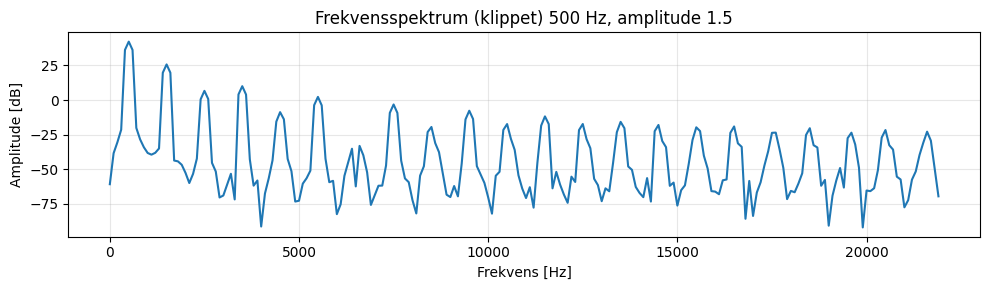

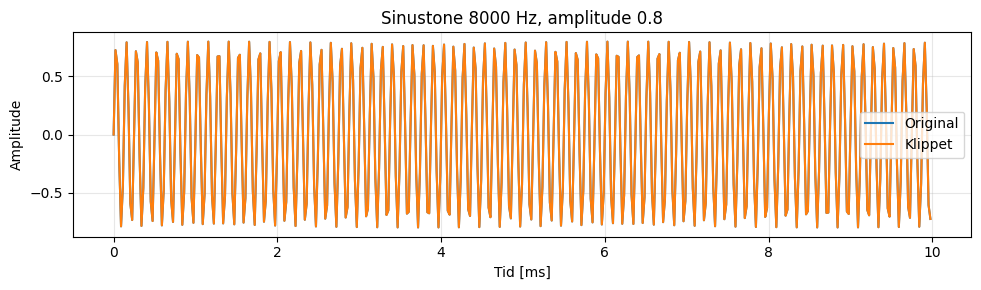

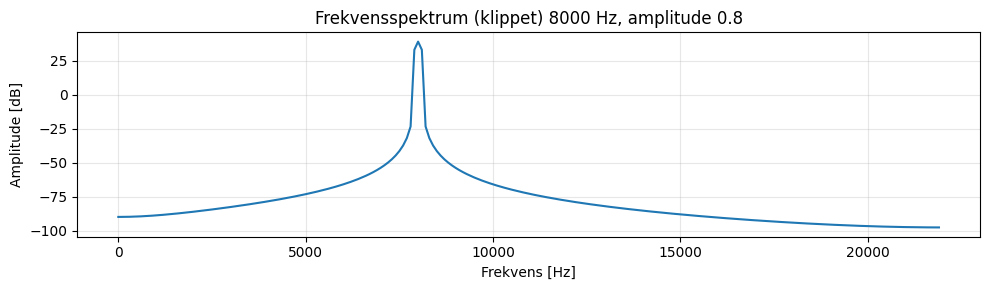

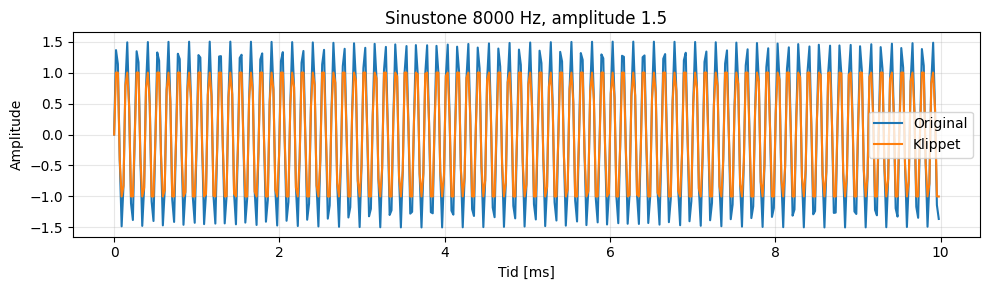

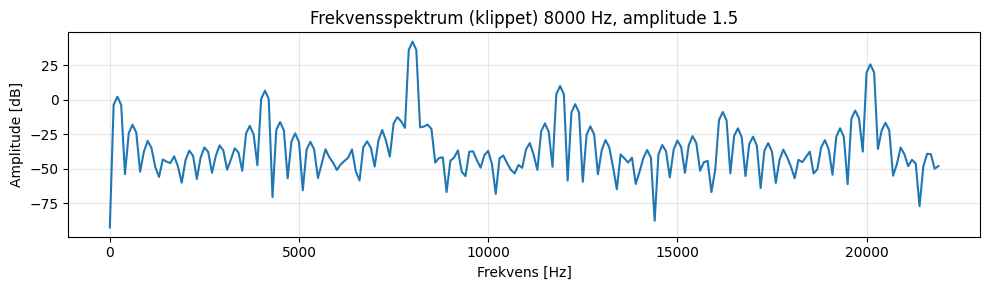

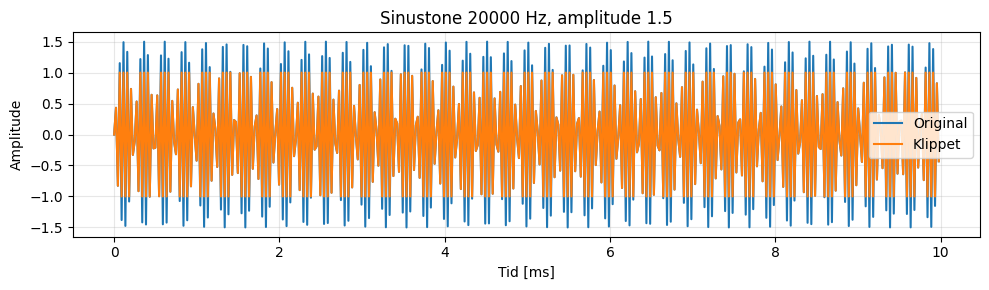

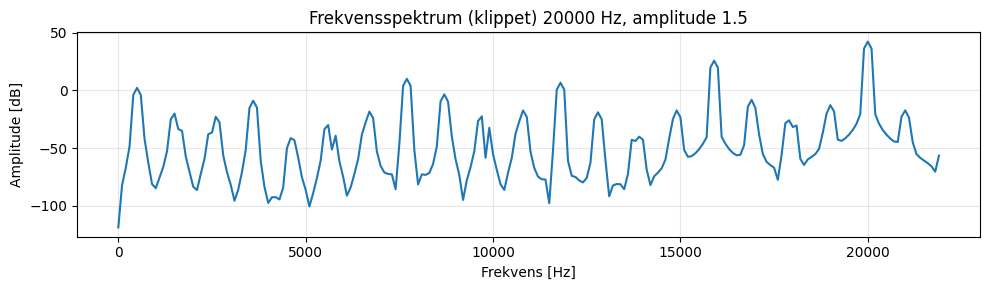

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fs = 44100  # Samplerate
T = 0.01    # Plot 10 ms
N = int(T * fs)

def hard_clip(x, min_val=-1, max_val=1):
    """Hård klipning mellem min_val og max_val"""
    return np.clip(x, min_val, max_val)

# Parametre for test
test_tones = [
    {'freq': 500, 'amp': 0.8},    # Lav frekvens, lav amplitude
    {'freq': 500, 'amp': 1.5},    # Lav frekvens, høj amplitude (klipning)
    {'freq': 8000, 'amp': 0.8},   # Høj frekvens, lav amplitude
    {'freq': 8000, 'amp': 1.5},   # Høj frekvens, høj amplitude (klipning)
    {'freq': 20000, 'amp': 1.5},  # Meget høj frekvens, klipning
]

t = np.arange(N) / fs

for i, params in enumerate(test_tones):
    freq = params['freq']
    amp = params['amp']
    x = amp * np.sin(2 * np.pi * freq * t)
    y = hard_clip(x)

    # Plot tidssignal
    plt.figure(figsize=(10,3))
    plt.plot(t*1000, x, label='Original')
    plt.plot(t*1000, y, label='Klippet')
    plt.title(f'Sinustone {freq} Hz, amplitude {amp}')
    plt.xlabel('Tid [ms]')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Plot frekvensspektrum
    X = np.fft.fft(y * np.hanning(N))
    freqs = np.fft.fftfreq(N, 1/fs)
    plt.figure(figsize=(10,3))
    plt.plot(freqs[:N//2], 20*np.log10(np.abs(X[:N//2])+1e-12))
    plt.title(f'Frekvensspektrum (klippet) {freq} Hz, amplitude {amp}')
    plt.xlabel('Frekvens [Hz]')
    plt.ylabel('Amplitude [dB]')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Aliasing optræder når de harmoniske komponenter, der opstår ved klipning, ligger over halvdelen af sampleraten (Nyquist-frekvensen). Disse foldes tilbage (aliases) ned i det hørbare område og kan ses som "spejlede" frekvenser i spektret for de høje frekvenser og/eller høje amplituder.

